In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [72]:
data=pd.read_csv("C:\\Users\\GAYATHRY N S\\Downloads\\house_price.csv")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#### 1 Perform basic EDA

In [76]:
data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [78]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [80]:
data.shape


(13200, 7)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [ ]:
data.describe()

In [84]:
data.isnull().sum()


location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

<Axes: xlabel='price_per_sqft', ylabel='Density'>

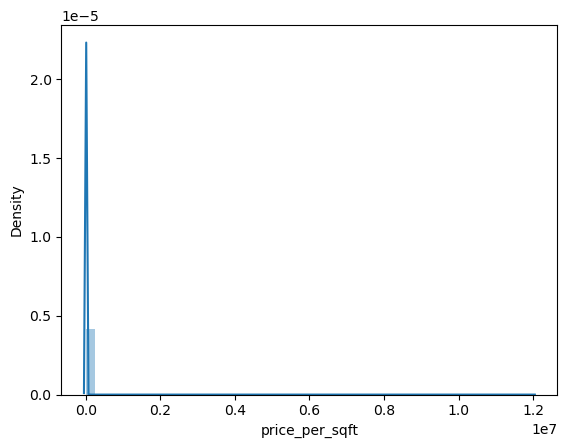

In [74]:
sns.distplot(data["price_per_sqft"])

##### The dataset contain 13200 rows and 7 columns, did not have null values and no duplicate values

#### Checking Outliers

##### (a) Mean and standerd deviation method

In [ ]:
mean=data.price_per_sqft.mean()
print("mean=",mean)

In [86]:
standerd_deviation=data.price_per_sqft.std()
print("standerd_deviation=",standerd_deviation)
lower_bound=mean-(3 * standerd_deviation)
upper_bound=mean+(3 * standerd_deviation)

outliers=data[(data.price_per_sqft > upper_bound)  | (data.price_per_sqft < lower_bound)]
print("Outliers detected\n",outliers)


standerd_deviation= 106727.16032810845
Outliers detected
              location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


In [ ]:
# mean_pps = data['price_per_sqft'].mean()
# std_pps = data['price_per_sqft'].std()
# upper_limit = mean_pps + 3 * std_pps
# lower_limit = mean_pps - 3 * std_pps
# df_trimmed_mean_std = data[(data['price_per_sqft'] >= lower_limit) & (data['price_per_sqft'] <= upper_limit)]
# df_trimmed_mean_std

##### 5 outliers detected using mean std method

### (b) Percentile Method

In [88]:
# Calculate 5th and 95th percentiles
lower_percentile = np.percentile(data['price_per_sqft'], 5)
upper_percentile = np.percentile(data['price_per_sqft'], 95)

# Detect Outliers
outliers_percentile = data[(data['price_per_sqft'] < lower_percentile) | (data['price_per_sqft'] > upper_percentile)]

print("Outliers detected using the Percentile Method:\n", outliers_percentile)

Outliers detected using the Percentile Method:
                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
20              Kengeri      1 BHK       600.0   1.0   15.0    1   
41       Sarjapur  Road      3 BHK      1254.0   3.0   38.0    3   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
...                 ...        ...         ...   ...    ...  ...   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   
13199      Doddathoguru      1 BHK       550.0   1.0   17.0    1   

       price_per_sqft  
7               18181  
9               36274  
20               2500  
41               3030  
45             

#### 1320 outliers detected using Percentile method

#### (c) IQR Method¶

In [ ]:
# Q1 = df['price_per_sqft'].quantile(0.25)
# Q3 = df['price_per_sqft'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_trimmed_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [90]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data['price_per_sqft'], 25)
Q3 = np.percentile(data['price_per_sqft'], 75)
IQR = Q3 - Q1

# Define Outlier Boundaries
lower_bound_iqr = Q1 - (1.5 * IQR)
upper_bound_iqr = Q3 + (1.5 * IQR)

# Detect Outliers
outliers_iqr = data[(data['price_per_sqft'] < lower_bound_iqr) | (data['price_per_sqft'] > upper_bound_iqr)]

print("Outliers detected using the IQR Method:\n", outliers_iqr)

Outliers detected using the IQR Method:
                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
22          Thanisandra  4 Bedroom      2800.0   5.0  380.0    4   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
48             KR Puram  2 Bedroom       800.0   1.0  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0   1.0  185.0    2   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft  
7               18181  
9               36274  
22              13571  
45              33333  
48              16250 

##### 1265 outliers detected using IQR Method

### (4) Z Score Method¶

In [ ]:
from scipy.stats import zscore

In [92]:
# Compute Z-score
data['z_score'] = zscore(data['price_per_sqft'])

# Detect Outliers
outliers_z = data[(data['z_score'] < -3) | (data['z_score'] > 3)]

print("Outliers detected using the Z-Score Method:\n", outliers_z)

Outliers detected using the Z-Score Method:
              location       size  total_sqft  bath  price  bhk  \
345             other  3 Bedroom        11.0   3.0   74.0    3   
1106            other  5 Bedroom        24.0   2.0  150.0    5   
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4   
4924            other      7 BHK         5.0   7.0  115.0    7   
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4   

       price_per_sqft     z_score  
345            672727    6.229266  
1106           625000    5.782062  
4044         12000000  112.366280  
4924          2300000   21.476881  
11447          363333    3.330231  


##### 5 outliers detected using z score method¶

### Remove Outliers

#### Trimming Method

In [94]:
data_trimmed = data[(data['price_per_sqft'] >= lower_bound_iqr) & 
                    (data['price_per_sqft'] <= upper_bound_iqr)]
print("Data after Trimming (Outliers Removed):\n", data_trimmed)

Data after Trimming (Outliers Removed):
                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  


#### Capping Method

In [98]:
data['price_per_sqft_capped'] = np.where(data['price_per_sqft'] < lower_bound_iqr, lower_bound_iqr,
                                       np.where(data['price_per_sqft'] > upper_bound_iqr, upper_bound_iqr, 
                                                data['price_per_sqft']))

print("Data After Capping Outliers:\n", data)


Data After Capping Outliers:
                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  price_per_sq

#### Imputation

In [96]:
median_price_per_sqft = data['price_per_sqft'].median()


# Replace Outliers with Median
data['price_per_sqft_imputed'] = np.where((data['price_per_sqft'] < lower_bound_iqr) | 
                                        (data['price_per_sqft'] > upper_bound_iqr),
                                        median_price_per_sqft, data['price_per_sqft'])

print("Data After Median Imputation:\n", data)

Data After Median Imputation:
                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  price_per_s

##### Create a box plot and use this to determine which method seems to work best to remove outliers 

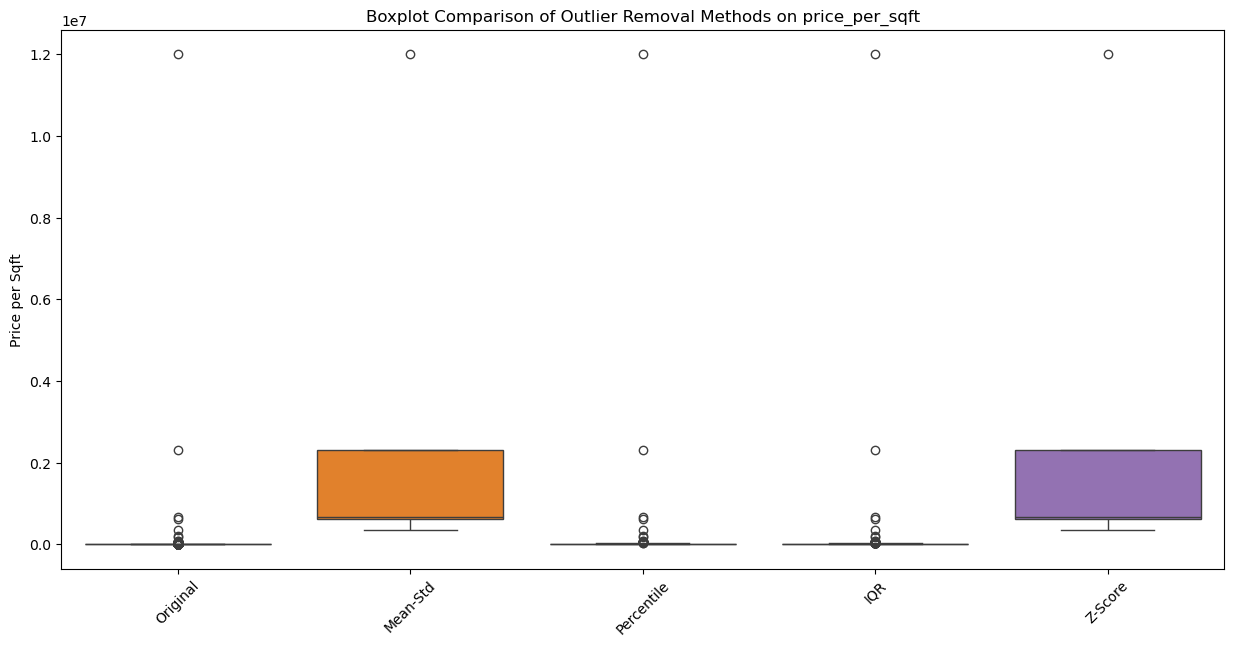

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for boxplots
datasets = {
    'Original': data['price_per_sqft'],
    'Mean-Std': outliers['price_per_sqft'],
    'Percentile':outliers_percentile ['price_per_sqft'],
    'IQR': outliers_iqr['price_per_sqft'],
    'Z-Score': outliers_z['price_per_sqft']
}

# Plot boxplots for comparison
plt.figure(figsize=(15, 7))
sns.boxplot(data=pd.DataFrame(datasets))
plt.title('Boxplot Comparison of Outlier Removal Methods on price_per_sqft')
plt.ylabel('Price per Sqft')
plt.xticks(rotation=45)
plt.show()


##### Based on the box plot analysis, the Percentile Method (1st-99th percentile) is the most effective outlier removal technique for this dataset. It strikes a good balance between trimming outliers and retaining meaningful data.”



##### Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats




In [ ]:
# # Histogram before transformation
# sns.histplot(data['price_per_sqft'], kde=True, color='skyblue')
# plt.title('Histogram of price_per_sqft')
# plt.xlabel('Price per Sqft')
# plt.show()




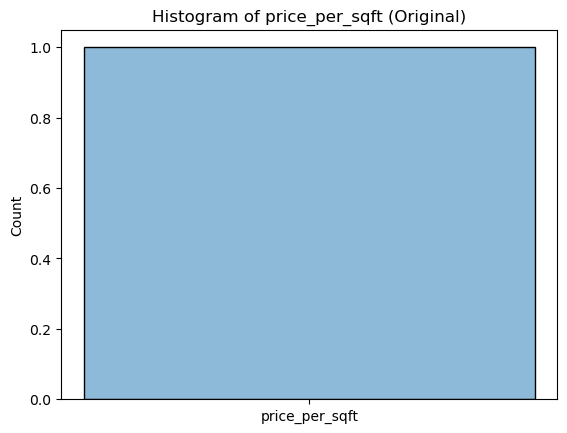

Skewness (Original): 0.9446919636125651
Kurtosis (Original): 0.6792271586816425


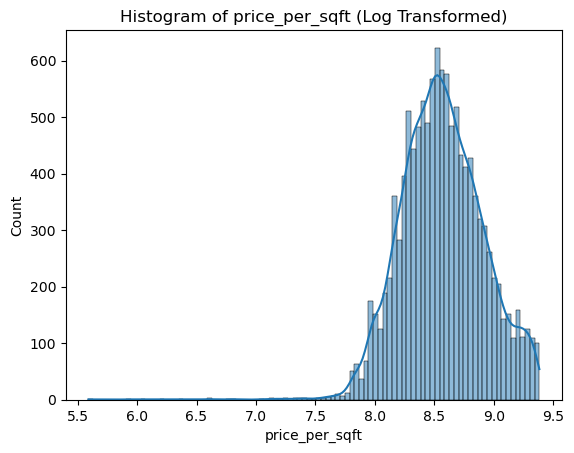

KeyError: 'price_per_sqft_log'

In [104]:
import scipy.stats as stats

# Histogram before transformation
sns.histplot(['price_per_sqft'], kde=True)
plt.title('Histogram of price_per_sqft (Original)')
plt.show()


#Skewness and Kurtosis
print("Skewness (Original):", data_trimmed['price_per_sqft'].skew())
print("Kurtosis (Original):", data_trimmed['price_per_sqft'].kurt())

# Log Transformation
datasets['price_per_sqft_log'] = np.log1p(data_trimmed['price_per_sqft'])

# Histogram after transformation
sns.histplot(datasets['price_per_sqft_log'], kde=True)
plt.title('Histogram of price_per_sqft (Log Transformed)')
plt.show()

# Skewness and Kurtosis after transformation
print("Skewness (Log Transformed):", data_trimmed['price_per_sqft_log'].skew())
print("Kurtosis (Log Transformed):", data_trimmed['price_per_sqft_log'].kurt())


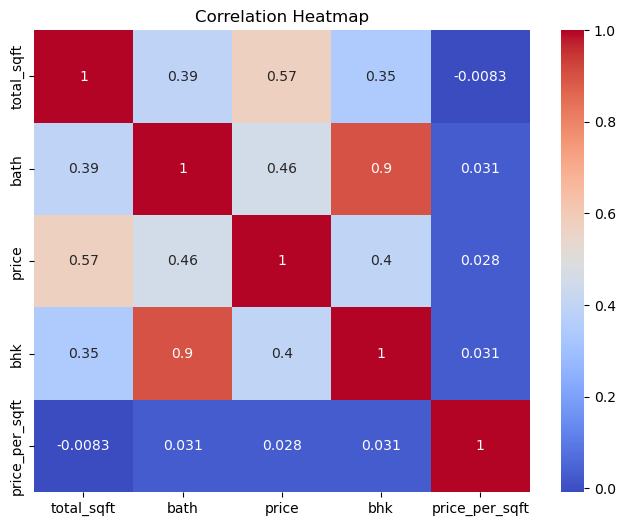

In [108]:
plt.figure(figsize=(8, 6))
corr = data[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


####  Draw Scatter plot between the variables to check the correlation between them.

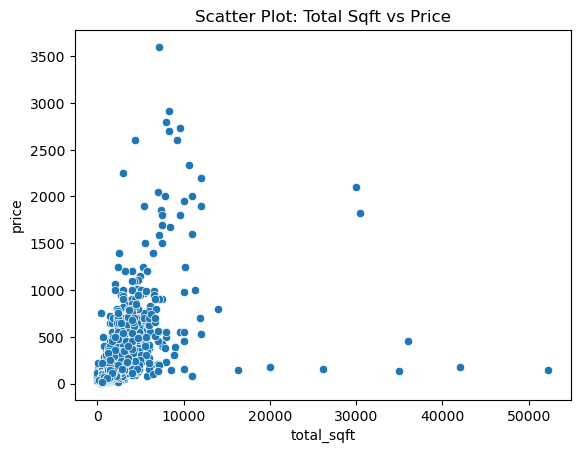

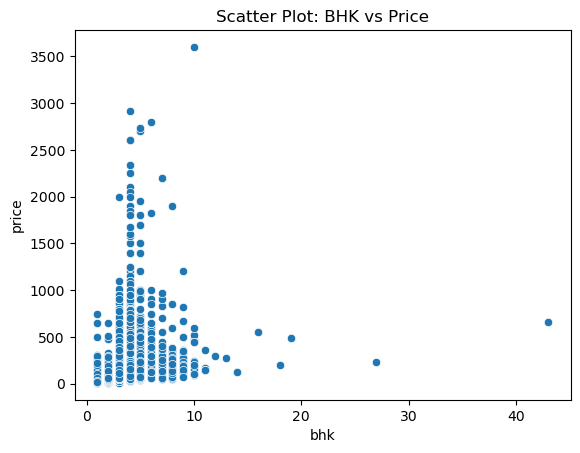

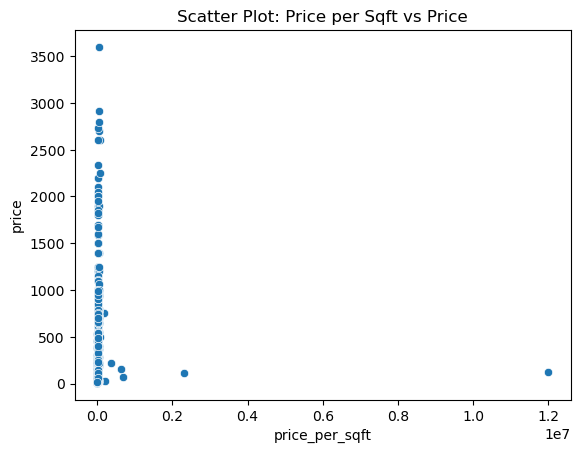

In [112]:
# Scatter plot: total_sqft vs price
sns.scatterplot(x='total_sqft', y='price', data=data)
plt.title('Scatter Plot: Total Sqft vs Price')
plt.show()

# Scatter plot: bhk vs price
sns.scatterplot(x='bhk', y='price', data=data)
plt.title('Scatter Plot: BHK vs Price')
plt.show()

# Scatter plot: price_per_sqft vs price
sns.scatterplot(x='price_per_sqft', y='price', data=data)
plt.title('Scatter Plot: Price per Sqft vs Price')
plt.show()



##### From above scatter chart
Size of the house generally increases the price, but other factors like location and amenities might cause some variation.
BHK count impacts price but increasing BHK beyond a point does not guarantee higher pricing.
price_per_sqft is influenced more by local market conditions, location, or luxury status rather than just size or BHK count.
Not directly correlated with total price due to variance across locations.


